In [2]:
import random
random.seed(1000)
import matplotlib.pyplot as plt

# Create Data

In [3]:
# number of elements in list
n = 50

# list of unsorted items
items = [int(random.random()*n) for _ in range(n)]

# value to be searched in list
value = int(random.random()*n)

# sorted list 
sorted_items = sorted(items)

# Find Value in Unsorted List with Linear Search

Animation: https://yongdanielliang.github.io/animation/web/LinearSearchNew.html

In [4]:
def get_item(items, index):
    """value of of an item in a list based on the index of the value
        args:
            - items: List of items
            - index: index of the requested item
        return:
            - value of the requested item
    """
    if index == -1:
        print("Not in the list")
        return None
    else:
        return items[index] 

In [5]:
def find_element(items, value):
    """Linear search for a value in a list of items
        args:
            - items: unsorted list of items
            - value: searched value
        return:
            - index of value or -1 if not in list
    """
    # TODO
    for i in range(len(items)):
        if value == items[i]:
            return items[i]
        else:
            return -1
    #pass

In [6]:
index = find_element(items, value)
print(index)

-1


In [7]:
print(value)
get_item(items, index)

14
Not in the list


### Question: 
* Time your function with differently sized inputs by
* searching for each input size for a non-existing element
* and plot the change of the time to the size of the input

(see 1 Timing Algorithms)

In [8]:
# TODO
import timeit

In [9]:
#%%timeit
#get_item(items, index)

In [10]:
%%timeit
find_element(items, value)

360 ns ± 7.96 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
#Plotting Time as a Function of Input Size n
list_of_n = [10, 50, 100, 200, 300, 400, 600, 800]

353 ns ± 1.67 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
367 ns ± 6.93 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
362 ns ± 4.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
363 ns ± 2.88 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
440 ns ± 7.08 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
444 ns ± 4.38 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
523 ns ± 29.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
528 ns ± 19.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


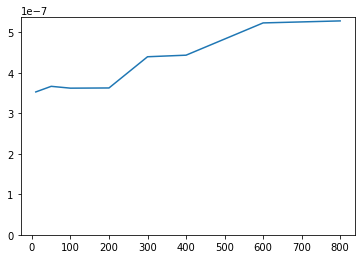

In [12]:
measures = []
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o find_element(items, value)
    measures.append((n, time.average))
plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

### Question: What is the time complexity of searching for a value in an unsorted list?

Big O Notation

TODO: Your answer

O(n)
Because it's a linear search with a for loop which has to be gone through n times.

# Find Value in Sorted list with Binary Search

Animation: https://yongdanielliang.github.io/animation/web/BinarySearchNew.html

In [13]:
def find_sorted(items, value):
    """Bineary search for a value in a list of sorted items
        args:
            - items: sorted list of items
            - value: searched value
        return:
            - index of value or -1 if not in list
    """
    # TODO
    from bisect import bisect_left
    
    'Locate the leftmost value exactly equal to x'
    i = bisect_left(items, value)
    if i != len(items) and items[i] == value:
        return i
    return -1
    
    
    """
    #option 2
    lo = 0
    hi = len(items)  # hi defaults to len(items)   
    pos = bisect_left(items, value, lo, hi)  # find insertion position
    return pos if pos != hi and items[pos] == value else -1  # don't walk off the end
    """
    
    
    """
    #option 3
    lo = 0 
    hi = len(items)
    while lo < hi:
        mid = (lo+hi)//2
        midval = items[mid]
        if midval < value:
            lo = mid+1
        elif midval > value: 
            hi = mid
        else:
            return mid
    return -1
    """

In [14]:
# a value that is not in the list so that we get the worst case time
value = n+1 
find_sorted(sorted_items, value)

-1

In [15]:
n = 100
items = [int(random.random()*n) for _ in range(n)]
value = n+1 
find_sorted(sorted_items, value)

-1

In [16]:
n = 200
items = [int(random.random()*n) for _ in range(n)]
value = n+1 
find_sorted(sorted_items, value)

-1

### Question: 
* Time your function with differently sized inputs by
* searching for each input size for a non-existing element
* and plot the change of the time to the size of the input

(see 1 Timing Algorithms)

1.33 µs ± 71.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.35 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.36 µs ± 50.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.34 µs ± 36.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.69 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.45 µs ± 25.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.48 µs ± 29.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.53 µs ± 54.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


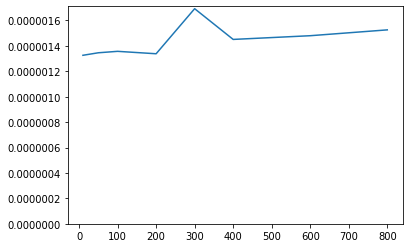

In [17]:
# TODO
measures = []
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o find_sorted(items, value)
    measures.append((n, time.average))
plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

### Question: What is the time complexity of binary search? 

Big O Notation

TODO: Your answer

O(log n)
Because it's a logarithmic search in a sorted array.